In [1]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from pycmqlib3.utility import dataseries
from pycmqlib3.utility import dbaccess
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh


In [3]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF", 'nr']
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA', 'lh'] # 'CY', 
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2019,4,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,9,1),  'sn':datetime.date(2017,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2019,4,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1),}

In [4]:
from numpy.lib.stride_tricks import sliding_window_view

def rolling_percentile(ts, win = 100, direction = 'max'):
    data = ts.to_numpy()
    sw = sliding_window_view(data, win, axis=0).T
    scores_np = np.empty(len(ts))
    scores_np.fill(np.nan)
    scores_np[(win-1):] = ((sw <= sw[-1:, ...]).sum(axis=0).T / sw.shape[0]).flatten()
    scores_np_ts = pd.Series(scores_np, index = ts.index)
    if direction == 'min':
        scores_np_ts = 1 - scores_np_ts
    return scores_np_ts


In [4]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2022, 1, 28)

delimiter = '-'
rev_char = '!'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts + ['T', 'TF'] # ['IF', 'IH', 'IC'] #
shift_mode = 1
freq = 'd'

old_nearby = True
if old_nearby:
    nearby_func = misc.nearby
else:
    nearby_func = dataseries.nearby

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'shift_mode': shift_mode}
v_args  = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'shift_mode': shift_mode}
bond_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            if old_nearby == False:
                contlist, exch = dbaccess.prod_main_cont_exch(asset)
                use_args['contract_filter'] = contlist 
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = nearby_func(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = i, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_d

loading mkt = sc, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = sc, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = fu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = eg, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 5, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = eg, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 5, 1), 'end

loading mkt = lh, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2021, 5, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = T, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = T, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
loading mkt = TF, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 1}
loading mkt = TF, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2022, 1, 28), 'n': 2}
            date  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
2672  2021-12-31    4282.0    4348.0   4267.0     4315.0    

In [6]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    exec_field = input_args.get('exec_field', 'open')
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))    
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0

        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    if asset_scaling:
        adf['scaling'] = 30.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling']  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


In [7]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')

    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0
            
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    if asset_scaling:
        adf['scaling'] = 30.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling']\
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields     
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

In [8]:
#ind_metal_mkts
# scenarios = [('tscarry', 'ryield', 0.33, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'macdnma', 0.03, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
#              ('tsmom', 'macdnma', 0.03, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
#              ('tsmom', 'macdnma', 0.03, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
#              #('xsmom', 'mom', 0.0, 130, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'mom', 0.0, 230, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 60, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 10, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 40, 20, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'macdnma', 0.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#             ] 

#commod_mkts
scenarios_elite = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
]

scenarios_elite_new = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
        ('tsmom', 'ewmac', 0.09, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.07, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.04, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.025, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.18, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.216, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.255, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.4, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),                       
]


#commod_mkts
scenarios_all = [ \
             ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             #('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldsma', 0.15, 1, 110, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma',1.5, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma', 1.8, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldnma', 0.2, 1, 210, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('tsmom', 'momxma', 0.2, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'momxma', 0.15, 40, 80, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.375, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 30, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 220, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 40, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 110, 5, (misc.sign, {}, 'sign'), [0.0]), \
             ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
             ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
             ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
             #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 70, 60, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 100, 80, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 90, 10, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'macdnma', 0.1, 8, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 12.5], 0.2), \
             #('xsmom', 'macdnma', 0.1, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
             #('xsmom', 'macdnma', 0.1, 32, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 3.125], 0.2), \
             #('xsmom', 'macdnma', 0.1, 64, 100, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 1.56], 0.2), \
            ]

scenarios_mixed = [('tscarry', 'ryield', 3.0, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'macdnma', 1.0, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
                 ('tsmom', 'macdnma', 1.0, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
                 ('tsmom', 'macdnma', 1.0, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
                 #('xsmom', 'mom', 1.0, 130, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'mom', 1.0, 230, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 60, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 10, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 40, 20, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'macdnma', 1.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), 
] 


scenarios_intraday = [ \
             #('xsfact', 'trdstrsma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xsfact', 'trdstrsma', 1.0, 1, 15, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 5, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 20, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
            ]

scenarios_test = [
    ('tsmom', 'ewmac', 1.0, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),
]

def transform_output(vdf):    
    udf = vdf.reset_index()
    udf.columns = ['index', 'value']
    udf['metric'] = udf['index'].apply(lambda x: '_'.join(x.split('_')[:-1]))
    udf['tenor'] = udf['index'].apply(lambda x: x.split('_')[-1])
    udf['tenor_in_years'] = udf['tenor'].apply(lambda x: int(x[:-1])/12 if 'm' in x else int(x[:-1]))
    out_df = pd.pivot_table(udf, index = 'tenor_in_years', columns = 'metric', values = 'value')    
    return out_df.round(2)



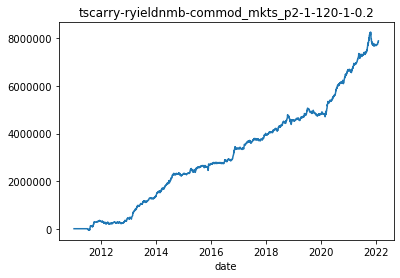

tscarry-ryieldnmb-commod_mkts_p2-1-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.69           2.52          1.85  39782.87
1.0                     2.46           3.57          2.25  33423.66
2.0                     3.34           5.09          2.72  29646.70
3.0                     2.72           4.29          1.97  26445.84
4.0                     2.51           3.91          1.75  25459.11
5.0                     2.47           3.82          1.61  23784.00
6.0                     2.45           3.81          1.52  22718.07
7.0                     2.34           3.69          1.43  22216.08
8.0                     2.40           3.78          1.42  21535.73
9.0                     2.58           4.05          1.48  20884.15
10.0                    2.46           3.85          1.36  20199.27
11.0                    2.40           3.69          1.29  19525.20


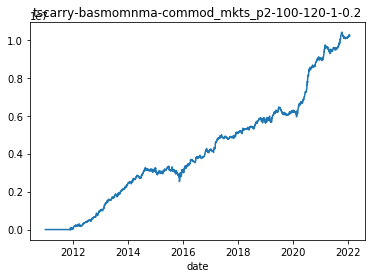

tscarry-basmomnma-commod_mkts_p2-100-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.43           4.37          3.87  34058.63
1.0                     2.06           3.62          2.77  38646.44
2.0                     3.29           5.84          4.49  39193.89
3.0                     2.60           4.48          2.93  37109.26
4.0                     2.26           3.59          2.51  36512.42
5.0                     2.28           3.63          2.39  34576.67
6.0                     2.26           3.60          2.28  33221.97
7.0                     1.94           3.05          1.33  34677.37
8.0                     1.86           2.91          1.24  33881.35
9.0                     2.03           3.17          1.31  32771.02
10.0                    2.06           3.19          1.28  31613.88
11.0                    2.00           2.97          1.19  30338.83

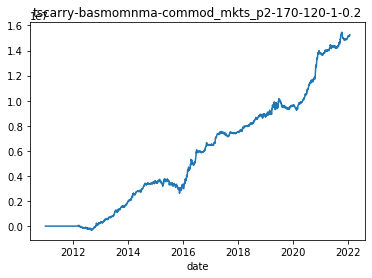

tscarry-basmomnma-commod_mkts_p2-170-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.27           4.08          3.09  53648.49
1.0                     2.10           3.55          2.56  48188.14
2.0                     3.54           6.09          4.64  51775.21
3.0                     2.45           3.95          2.36  56485.28
4.0                     2.37           3.70          2.14  52957.16
5.0                     2.31           3.59          1.94  49475.90
6.0                     2.49           4.07          2.17  51001.52
7.0                     2.07           3.34          1.49  52726.36
8.0                     2.12           3.39          1.46  50698.05
9.0                     2.23           3.52          1.48  48694.47
10.0                    2.12           3.32          1.35  46789.60
11.0                    2.03           3.02          1.23  44684.57

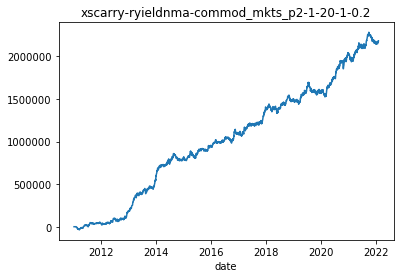

xscarry-ryieldnma-commod_mkts_p2-1-20-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.88           1.42          0.96   9505.33
1.0                     1.24           2.13          1.42  10065.90
2.0                     1.78           2.78          2.14  10552.89
3.0                     1.49           2.40          1.43  10173.64
4.0                     1.31           2.10          1.19   9655.99
5.0                     1.54           2.47          1.35   9293.15
6.0                     1.44           2.33          1.23   9035.86
7.0                     1.49           2.36          1.22   8715.48
8.0                     1.43           2.29          1.16   8594.28
9.0                     1.69           2.70          1.35   8465.83
10.0                    1.71           2.70          1.32   8177.32
11.0                    1.65           2.55          1.22   7860.15


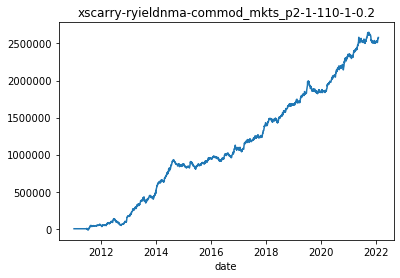

xscarry-ryieldnma-commod_mkts_p2-1-110-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.74           1.10          0.79  10148.65
1.0                     1.48           2.44          1.64  10469.19
2.0                     2.34           3.99          2.50  10078.02
3.0                     1.94           3.36          1.77   9778.72
4.0                     1.99           3.39          1.73   9324.24
5.0                     2.18           3.65          1.83   9028.66
6.0                     1.99           3.33          1.62   8761.29
7.0                     1.92           3.20          1.51   8460.24
8.0                     1.92           3.22          1.49   8318.70
9.0                     2.10           3.46          1.61   8221.51
10.0                    2.08           3.37          1.54   7948.38
11.0                    2.01           3.17          1.43   7628.06


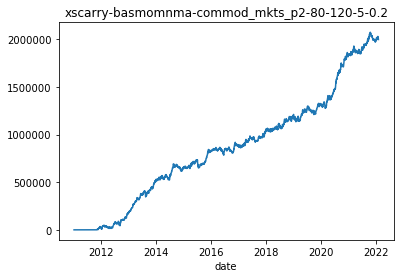

xscarry-basmomnma-commod_mkts_p2-80-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio  std_pnl
tenor_in_years                                                    
0.5                     0.89           1.32          1.12  8131.82
1.0                     1.03           1.57          1.45  9097.00
2.0                     2.44           3.94          3.41  9029.61
3.0                     2.14           3.44          2.87  8661.37
4.0                     1.80           2.78          2.40  8605.00
5.0                     1.77           2.75          2.26  8224.70
6.0                     1.56           2.44          1.93  7973.89
7.0                     1.61           2.50          1.94  7785.60
8.0                     1.58           2.47          1.85  7578.99
9.0                     1.76           2.73          2.01  7366.93
10.0                    1.79           2.74          1.98  7134.94
11.0                    1.74           2.55          1.84  6831.19


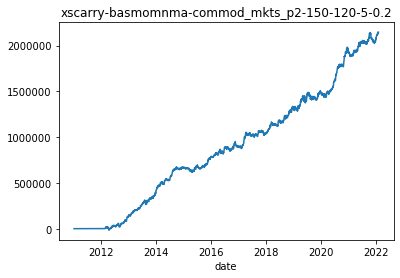

xscarry-basmomnma-commod_mkts_p2-150-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio  std_pnl
tenor_in_years                                                    
0.5                     1.53           2.92          1.77  8644.97
1.0                     1.89           3.42          2.19  8640.27
2.0                     2.47           4.06          2.94  8896.50
3.0                     1.97           3.10          2.43  9182.52
4.0                     1.96           3.04          2.34  8887.19
5.0                     1.94           2.99          2.19  8424.46
6.0                     1.80           2.82          1.97  8167.91
7.0                     1.77           2.79          1.86  7839.50
8.0                     1.82           2.86          1.84  7549.96
9.0                     1.98           3.08          1.94  7322.70
10.0                    1.98           3.03          1.88  7061.88
11.0                    1.89           2.76          1.71  6743.47


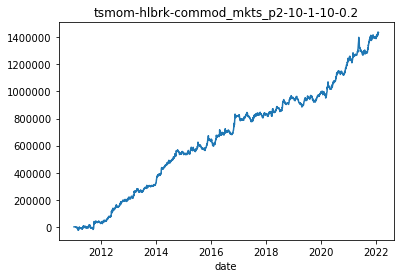

tsmom-hlbrk-commod_mkts_p2-10-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio  std_pnl
tenor_in_years                                                    
0.5                     2.56           3.85          7.45  7095.56
1.0                     1.66           2.48          1.62  8046.07
2.0                     2.07           3.06          1.79  7123.69
3.0                     1.68           2.52          1.29  6310.46
4.0                     1.68           2.56          1.22  5985.22
5.0                     1.45           2.25          1.01  5748.82
6.0                     1.57           2.48          1.09  5772.62
7.0                     1.47           2.29          1.01  5665.66
8.0                     1.56           2.44          1.04  5500.15
9.0                     1.66           2.59          1.08  5360.26
10.0                    1.73           2.71          1.10  5250.29
11.0                    1.66           2.59          1.03  5145.09


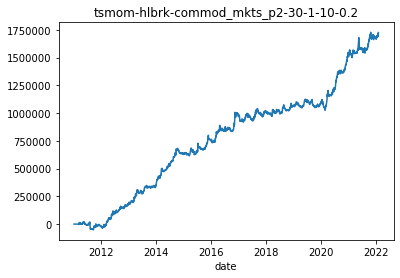

tsmom-hlbrk-commod_mkts_p2-30-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio  std_pnl
tenor_in_years                                                    
0.5                     2.07           3.16          4.79  9718.36
1.0                     1.31           1.96          1.43  9663.34
2.0                     2.32           3.40          2.38  9027.77
3.0                     1.77           2.59          1.60  7954.76
4.0                     1.59           2.34          1.34  7453.01
5.0                     1.42           2.13          1.17  7278.03
6.0                     1.46           2.25          1.21  7327.57
7.0                     1.41           2.14          1.15  7177.12
8.0                     1.52           2.32          1.21  7011.73
9.0                     1.62           2.49          1.26  6837.31
10.0                    1.70           2.62          1.29  6719.52
11.0                    1.56           2.37          1.16  6553.66


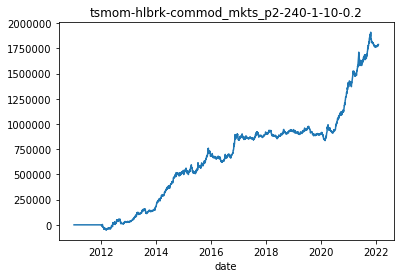

tsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.48           2.14          1.62  10297.01
1.0                     2.04           3.15          2.66  12249.97
2.0                     2.70           4.00          3.12  10853.38
3.0                     2.06           3.02          2.03   9263.07
4.0                     1.71           2.49          1.52   8347.45
5.0                     1.50           2.20          1.26   7868.02
6.0                     1.56           2.35          1.29   7800.37
7.0                     1.46           2.18          1.22   7877.20
8.0                     1.64           2.46          1.34   7717.88
9.0                     1.71           2.55          1.35   7437.66
10.0                    1.64           2.44          1.26   7195.22
11.0                    1.54           2.20          1.13   6884.47


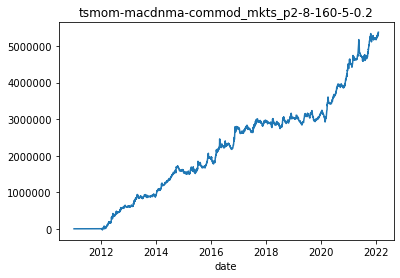

tsmom-macdnma-commod_mkts_p2-8-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.58           3.94          6.09  33698.30
1.0                     1.56           2.28          1.51  36342.18
2.0                     2.27           3.31          1.95  32028.98
3.0                     1.81           2.68          1.37  28228.45
4.0                     1.52           2.28          1.08  26630.63
5.0                     1.39           2.12          0.96  25654.56
6.0                     1.49           2.33          1.04  25968.20
7.0                     1.41           2.17          0.96  25424.38
8.0                     1.43           2.20          0.94  24441.40
9.0                     1.47           2.25          0.93  23571.67
10.0                    1.52           2.33          0.93  23001.73
11.0                    1.45           2.13          0.85  21971.52


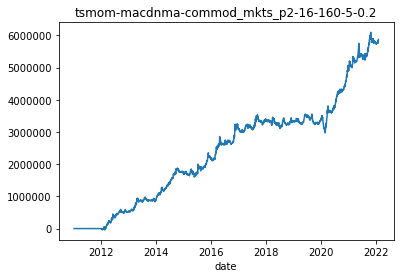

tsmom-macdnma-commod_mkts_p2-16-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.76           2.60          2.84  38304.53
1.0                     1.31           1.94          1.57  39335.24
2.0                     2.17           2.99          2.52  38181.32
3.0                     1.66           2.28          1.51  33355.66
4.0                     1.32           1.84          1.12  31115.55
5.0                     1.24           1.78          1.01  29992.76
6.0                     1.34           1.97          1.10  30177.92
7.0                     1.30           1.90          1.05  29515.77
8.0                     1.38           2.01          1.07  28452.44
9.0                     1.41           2.06          1.05  27391.30
10.0                    1.44           2.11          1.05  26685.84
11.0                    1.37           1.92          0.95  25480.60


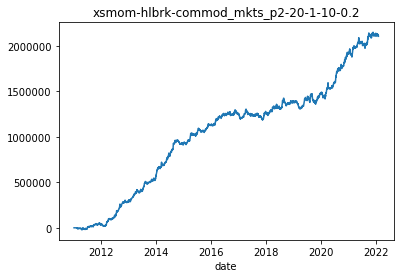

xsmom-hlbrk-commod_mkts_p2-20-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.17           1.73          3.56  10461.12
1.0                     1.29           2.02          1.75  10003.42
2.0                     2.30           3.66          2.97   9504.31
3.0                     1.75           2.92          2.15   9004.32
4.0                     1.64           2.74          1.90   8553.35
5.0                     1.45           2.41          1.57   8117.88
6.0                     1.34           2.23          1.42   7921.06
7.0                     1.45           2.39          1.47   7610.56
8.0                     1.58           2.57          1.58   7466.28
9.0                     1.79           2.92          1.75   7295.23
10.0                    1.91           3.09          1.82   7114.72
11.0                    1.82           2.91          1.67   6850.79


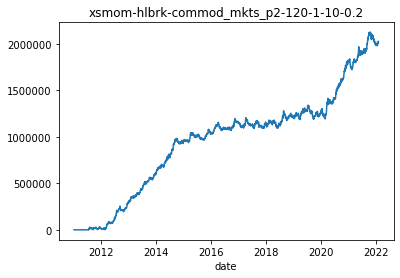

xsmom-hlbrk-commod_mkts_p2-120-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.08           1.80          1.37  11535.11
1.0                     1.54           2.53          1.91  11298.86
2.0                     2.29           3.77          2.79  11067.16
3.0                     1.69           2.85          1.87  10390.59
4.0                     1.45           2.35          1.53   9921.30
5.0                     1.25           1.98          1.26   9502.32
6.0                     1.15           1.82          1.12   9175.75
7.0                     1.13           1.77          1.06   8786.76
8.0                     1.29           2.03          1.19   8655.71
9.0                     1.46           2.28          1.31   8409.83
10.0                    1.61           2.50          1.40   8161.30
11.0                    1.54           2.31          1.28   7828.29


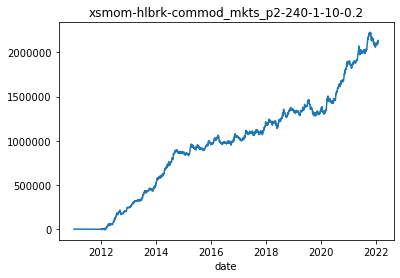

xsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.30           2.10          1.39  11506.24
1.0                     1.59           2.60          1.63  10954.87
2.0                     2.45           3.95          2.44  10648.33
3.0                     1.77           2.91          1.55  10053.40
4.0                     1.58           2.53          1.33   9667.44
5.0                     1.56           2.48          1.27   9307.23
6.0                     1.38           2.21          1.09   9039.90
7.0                     1.37           2.17          1.04   8695.52
8.0                     1.50           2.38          1.11   8501.85
9.0                     1.66           2.61          1.19   8221.22
10.0                    1.75           2.72          1.21   7942.73
11.0                    1.67           2.48          1.10   7584.99


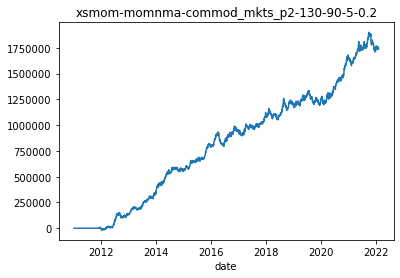

xsmom-momnma-commod_mkts_p2-130-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.50          -0.72         -0.45  10915.21
1.0                     0.71           1.05          0.65  10870.50
2.0                     1.58           2.34          1.40  10484.36
3.0                     1.21           1.84          1.00   9870.87
4.0                     1.08           1.63          0.86   9494.99
5.0                     1.16           1.74          0.89   9173.32
6.0                     1.11           1.70          0.85   9049.61
7.0                     1.22           1.84          0.89   8687.69
8.0                     1.28           1.95          0.91   8463.72
9.0                     1.39           2.10          0.96   8197.99
10.0                    1.44           2.14          0.96   7911.48
11.0                    1.36           1.95          0.87   7561.59


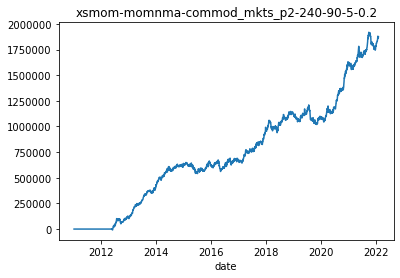

xsmom-momnma-commod_mkts_p2-240-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.84           2.89          1.69  10035.17
1.0                     1.62           2.68          1.54  10361.51
2.0                     2.59           4.19          2.37   9969.91
3.0                     1.76           2.77          1.44   9727.79
4.0                     1.51           2.37          1.19   9343.48
5.0                     1.76           2.76          1.33   9012.32
6.0                     1.57           2.45          1.15   8736.18
7.0                     1.35           2.09          0.96   8424.49
8.0                     1.39           2.14          0.95   8175.96
9.0                     1.61           2.43          1.06   7868.38
10.0                    1.61           2.39          1.03   7568.69
11.0                    1.54           2.17          0.93   7225.74


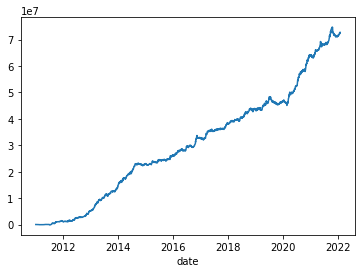

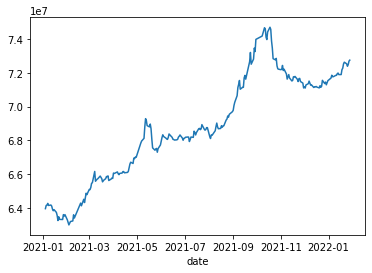

date
2021-12-17    7.115334e+07
2021-12-20    7.110666e+07
2021-12-21    7.123688e+07
2021-12-22    7.113891e+07
2021-12-23    7.120352e+07
2021-12-24    7.155317e+07
2021-12-27    7.136149e+07
2021-12-28    7.145003e+07
2021-12-29    7.128884e+07
2021-12-30    7.140399e+07
2021-12-31    7.153249e+07
2022-01-04    7.168797e+07
2022-01-05    7.185416e+07
2022-01-06    7.176444e+07
2022-01-07    7.176897e+07
2022-01-10    7.184393e+07
2022-01-11    7.184874e+07
2022-01-12    7.194237e+07
2022-01-13    7.198437e+07
2022-01-14    7.189375e+07
2022-01-17    7.189389e+07
2022-01-18    7.218546e+07
2022-01-19    7.226981e+07
2022-01-20    7.252286e+07
2022-01-21    7.262511e+07
2022-01-24    7.253027e+07
2022-01-25    7.238456e+07
2022-01-26    7.248616e+07
2022-01-27    7.268980e+07
2022-01-28    7.274613e+07
Name: daily_pnl, dtype: float64
metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5            

IndexError: index 17 is out of bounds for axis 0 with size 17

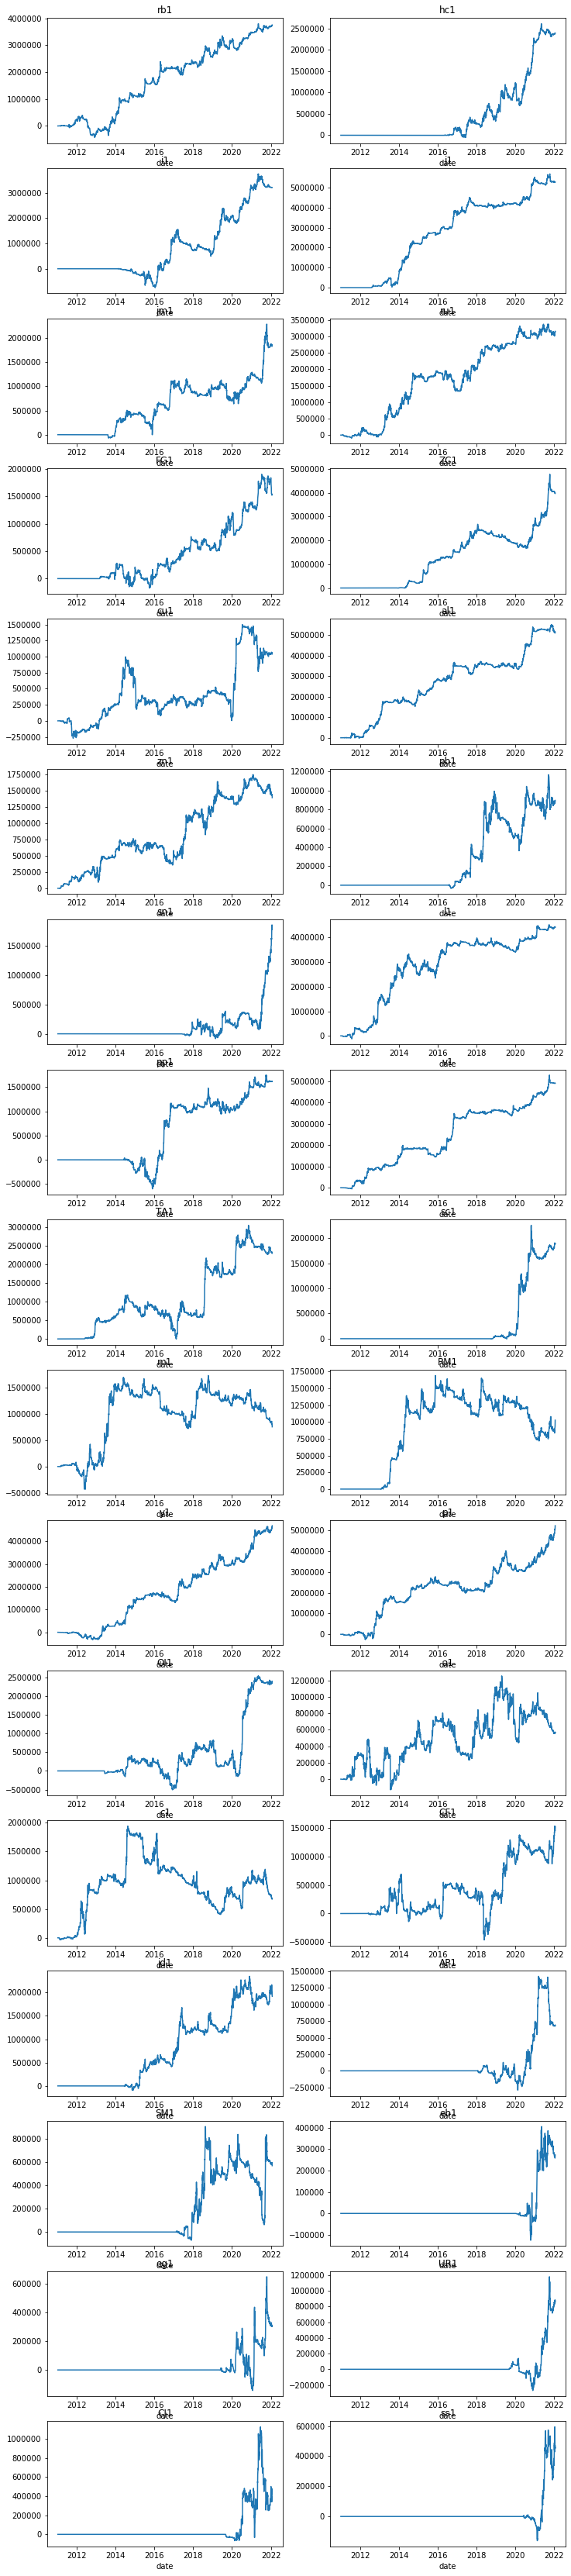

In [12]:
res = {}
stats_list = []
cum_list = []
rev_char = '!'

out_cols = ['sharpe_ratio', 'sortino_ratio', 'calmar_ratio', 'std_pnl']
pnl_tenors = ['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '11y']

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr', 'T', 'TF', 'lh']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg'] #, 'T', 'ni', 'MA', 'SR', 'SF', 'nr', 'bu']


product_list = commod_mkts_p2 # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts_p2' # 'metal_mixed_mkts'

scenarios = scenarios_elite

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2022,1,28)

quantile = 0.2
cost_ratio = 0.5
total_risk = 3000.0
asset_scaling = False
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]
pos_map = (None, {}, '')

exec_field = 'open'

save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

run_pos_sum = True
pos_sum = pd.DataFrame()
dpnl_sum = pd.DataFrame()
pos_list = []

port_pnl = pd.Series()
dpnl_by_scen = [] 

for scen in scenarios:
    if len(scen) >= 8:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 9:
                quantile = scen[8]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        pos_map = scen[6]
        params = scen[7]        
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['total_risk'] = total_risk
    run_args['asset_scaling'] = asset_scaling
    run_args['pnl_tenors'] = pnl_tenors
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot(title = run_name)
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']    
    print(run_name, '\n', transform_output(vdf)[out_cols])
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        dpnl_by_scen.append(res['cum_pnl'].diff().dropna())
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        dpnl_sum = dpnl_sum.add(res['dpnl'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
port_pnl[pd.to_datetime('2021-01-01'):].plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(port_pnl[-30:])
print(transform_output(vdf)[out_cols])
port_pnl.to_csv(file_folder + "port_pnl.csv")
cpnl = dpnl_sum.cumsum()

rows = int(len(product_list)/2)
fig, ax = plt.subplots(rows, 2, figsize=(12, 60))

for i, col in enumerate(cpnl.columns):
    row_id = i//2
    col_id = i % 2
    cpnl[col].plot(ax = ax[row_id, col_id], title = col)  


In [25]:
#pnl_stats_by_tenor(port_pnl[pd.to_datetime('2016-11-01'):pd.to_datetime('2017-11-01')].plot()
ts = port_pnl.diff()
np.sqrt(np.mean(ts[ts<0]*ts[ts<0])), np.std(ts), ts[ts<0].std()

(142973.1207751756, 157927.73728882178, 102430.30394456247)

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:200% !important;}</style>"))

          rb-pos      hc-pos       i-pos       j-pos      jm-pos      ru-pos  \
0       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
...          ...         ...         ...         ...         ...         ...   
2681  175.901646  102.148367 -279.667736  163.623736  238.326084 -140.569730   
2682  209.944286  129.609200 -268.954149  172.843866  243.544089 -139.006871   
2683  187.999686  115.767465 -119.977910  156.354812  227.820640 -136.257946   
2684  176.463698  121.354520  -16.179124   85.278345  283.939965 -147.013924   
2685  164.069012   90.044464  -48.831584   70.056958  203.079655 -132.644305   

          FG-pos       ZC-pos     cu-po

<ipython-input-68-0a172ac03eb7>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pnl_dict[scen[0]][scen[1]] = pd.Series()


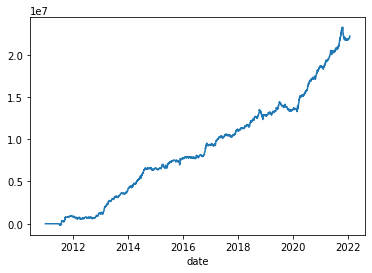

                           0
sharp_ratio_1y      2.574166
sharp_ratio_2y      3.384673
sharp_ratio_3y      2.701278
sharp_ratio_4y      2.490273
sharp_ratio_5y      2.464969
sharp_ratio_6y      2.417761
sharp_ratio_7y      2.306460
sharp_ratio_8y      2.369642
sharp_ratio_9y      2.550386
std_pnl_1y      93838.766574
std_pnl_2y      83464.784882
std_pnl_3y      74909.420420
std_pnl_4y      72411.418561
std_pnl_5y      67806.093703
std_pnl_6y      64740.703173
std_pnl_7y      63337.890281
std_pnl_8y      61428.085138
std_pnl_9y      59555.541471
sim_name = tscarry, run_mode = basmomnma


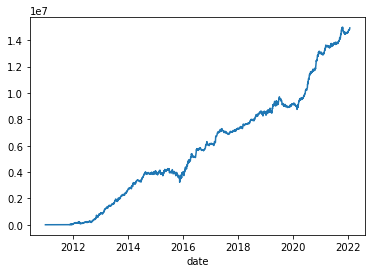

                           0
sharp_ratio_1y      2.606471
sharp_ratio_2y      3.738604
sharp_ratio_3y      2.674639
sharp_ratio_4y      2.541150
sharp_ratio_5y      2.488352
sharp_ratio_6y      2.590496
sharp_ratio_7y      2.148291
sharp_ratio_8y      2.136496
sharp_ratio_9y      2.286664
std_pnl_1y      49518.029864
std_pnl_2y      50206.086026
std_pnl_3y      51195.428112
std_pnl_4y      48993.215330
std_pnl_5y      46137.095104
std_pnl_6y      45784.130582
std_pnl_7y      47721.782501
std_pnl_8y      46303.656044
std_pnl_9y      44622.343215
corr for sim_name = tscarry
          0         1
0  1.000000  0.631366
1  0.631366  1.000000
combined pnl for sim_name = tscarry


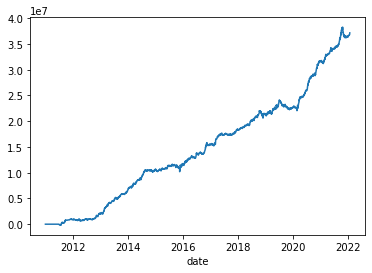

                            0
sharp_ratio_1y       2.817235
sharp_ratio_2y       3.801596
sharp_ratio_3y       2.927252
sharp_ratio_4y       2.738387
sharp_ratio_5y       2.705094
sharp_ratio_6y       2.745829
sharp_ratio_7y       2.501934
sharp_ratio_8y       2.532811
sharp_ratio_9y       2.718200
std_pnl_1y      131555.897163
std_pnl_2y      123685.346753
std_pnl_3y      115904.064393
std_pnl_4y      111314.880854
std_pnl_5y      104227.537865
std_pnl_6y      100199.676164
std_pnl_7y       99365.766179
std_pnl_8y       96529.178393
std_pnl_9y       93416.924110
sim_name = xscarry, run_mode = ryieldnma


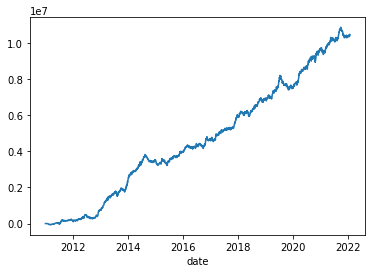

                           0
sharp_ratio_1y      1.528896
sharp_ratio_2y      2.195985
sharp_ratio_3y      1.858185
sharp_ratio_4y      1.814132
sharp_ratio_5y      1.999855
sharp_ratio_6y      1.891926
sharp_ratio_7y      1.879923
sharp_ratio_8y      1.832461
sharp_ratio_9y      2.042280
std_pnl_1y      40798.390443
std_pnl_2y      41850.191408
std_pnl_3y      41018.943603
std_pnl_4y      39215.763088
std_pnl_5y      37528.235150
std_pnl_6y      36554.953089
std_pnl_7y      35267.386003
std_pnl_8y      34588.992078
std_pnl_9y      34145.864835
sim_name = xscarry, run_mode = basmomnma


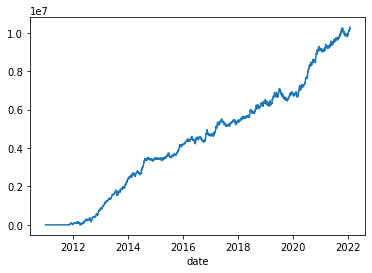

                           0
sharp_ratio_1y      1.977764
sharp_ratio_2y      2.706749
sharp_ratio_3y      1.995124
sharp_ratio_4y      1.951397
sharp_ratio_5y      1.855447
sharp_ratio_6y      1.741229
sharp_ratio_7y      1.727076
sharp_ratio_8y      1.793197
sharp_ratio_9y      1.985742
std_pnl_1y      41237.396160
std_pnl_2y      41825.966537
std_pnl_3y      41986.473602
std_pnl_4y      40881.084757
std_pnl_5y      39105.317298
std_pnl_6y      37981.425812
std_pnl_7y      36553.673555
std_pnl_8y      35467.534928
std_pnl_9y      34407.444375
corr for sim_name = xscarry
          0         1
0  1.000000  0.533776
1  0.533776  1.000000
combined pnl for sim_name = xscarry


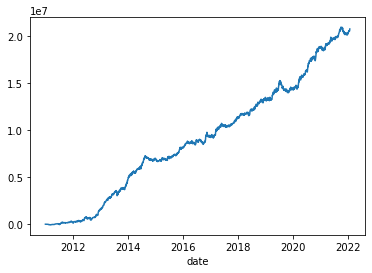

                           0
sharp_ratio_1y      2.103084
sharp_ratio_2y      2.843819
sharp_ratio_3y      2.201693
sharp_ratio_4y      2.159370
sharp_ratio_5y      2.215584
sharp_ratio_6y      2.072357
sharp_ratio_7y      2.065083
sharp_ratio_8y      2.072883
sharp_ratio_9y      2.297486
std_pnl_1y      68439.669273
std_pnl_2y      72126.518863
std_pnl_3y      72666.344055
std_pnl_4y      69889.729879
std_pnl_5y      66623.018651
std_pnl_6y      65284.924560
std_pnl_7y      62675.897676
std_pnl_8y      61259.253265
std_pnl_9y      60091.652108
sim_name = tsmom, run_mode = hlbrk


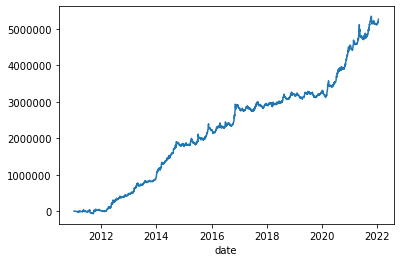

                           0
sharp_ratio_1y      1.637044
sharp_ratio_2y      2.419168
sharp_ratio_3y      1.953350
sharp_ratio_4y      1.815003
sharp_ratio_5y      1.612657
sharp_ratio_6y      1.675004
sharp_ratio_7y      1.604387
sharp_ratio_8y      1.731233
sharp_ratio_9y      1.845178
std_pnl_1y      30343.118815
std_pnl_2y      26893.688322
std_pnl_3y      23070.724803
std_pnl_4y      21129.335736
std_pnl_5y      20145.685611
std_pnl_6y      20221.621850
std_pnl_7y      19929.234319
std_pnl_8y      19484.198347
std_pnl_9y      18830.399147
sim_name = tsmom, run_mode = macdnma


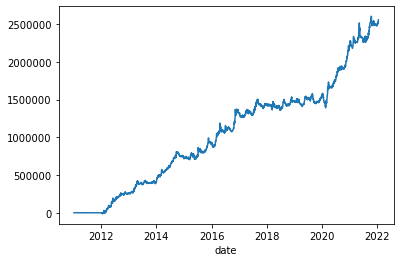

                           0
sharp_ratio_1y      1.154179
sharp_ratio_2y      2.014610
sharp_ratio_3y      1.684660
sharp_ratio_4y      1.416548
sharp_ratio_5y      1.324485
sharp_ratio_6y      1.425656
sharp_ratio_7y      1.359764
sharp_ratio_8y      1.405998
sharp_ratio_9y      1.442501
std_pnl_1y      17460.478981
std_pnl_2y      16107.193316
std_pnl_3y      14025.803109
std_pnl_4y      13087.484682
std_pnl_5y      12652.967015
std_pnl_6y      12841.425115
std_pnl_7y      12518.329203
std_pnl_8y      12046.021322
std_pnl_9y      11580.569172
corr for sim_name = tsmom
          0         1
0  1.000000  0.941499
1  0.941499  1.000000
combined pnl for sim_name = tsmom


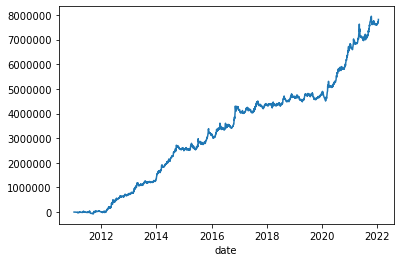

                           0
sharp_ratio_1y      1.469141
sharp_ratio_2y      2.289665
sharp_ratio_3y      1.874076
sharp_ratio_4y      1.684842
sharp_ratio_5y      1.522112
sharp_ratio_6y      1.600277
sharp_ratio_7y      1.531715
sharp_ratio_8y      1.630581
sharp_ratio_9y      1.717765
std_pnl_1y      47528.138754
std_pnl_2y      42587.036718
std_pnl_3y      36654.810090
std_pnl_4y      33765.104006
std_pnl_5y      32354.224223
std_pnl_6y      32606.071337
std_pnl_7y      31987.777814
std_pnl_8y      31073.825452
std_pnl_9y      29951.953074
sim_name = xsmom, run_mode = hlbrk


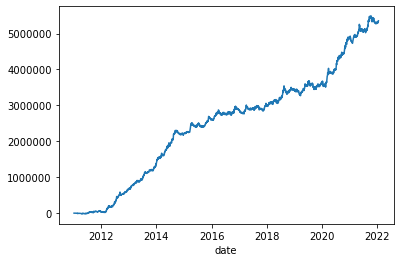

                           0
sharp_ratio_1y      1.416295
sharp_ratio_2y      2.487511
sharp_ratio_3y      1.926036
sharp_ratio_4y      1.839623
sharp_ratio_5y      1.676936
sharp_ratio_6y      1.539124
sharp_ratio_7y      1.563870
sharp_ratio_8y      1.699817
sharp_ratio_9y      1.910497
std_pnl_1y      23218.719105
std_pnl_2y      23168.221722
std_pnl_3y      21769.407791
std_pnl_4y      20813.462266
std_pnl_5y      19812.976793
std_pnl_6y      19443.858972
std_pnl_7y      18632.005498
std_pnl_8y      18308.913750
std_pnl_9y      17711.563682
sim_name = xsmom, run_mode = momnma


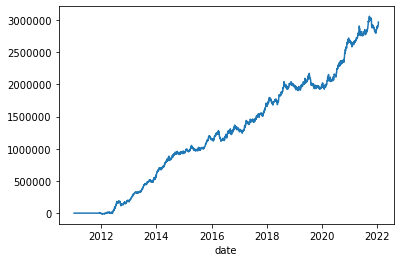

                           0
sharp_ratio_1y      1.379059
sharp_ratio_2y      2.147744
sharp_ratio_3y      1.533059
sharp_ratio_4y      1.480297
sharp_ratio_5y      1.672325
sharp_ratio_6y      1.524069
sharp_ratio_7y      1.502713
sharp_ratio_8y      1.545984
sharp_ratio_9y      1.716068
std_pnl_1y      14938.386722
std_pnl_2y      14929.612613
std_pnl_3y      14225.455323
std_pnl_4y      13681.691510
std_pnl_5y      13237.285269
std_pnl_6y      13011.600374
std_pnl_7y      12456.901270
std_pnl_8y      12105.386068
std_pnl_9y      11641.577524
corr for sim_name = xsmom
          0         1
0  1.000000  0.746487
1  0.746487  1.000000
combined pnl for sim_name = xsmom


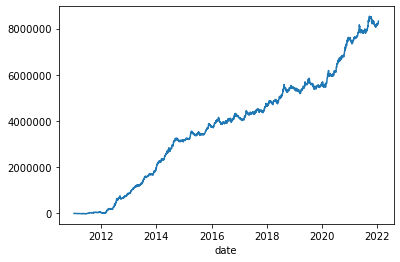

                           0
sharp_ratio_1y      1.509905
sharp_ratio_2y      2.512749
sharp_ratio_3y      1.892442
sharp_ratio_4y      1.812762
sharp_ratio_5y      1.787875
sharp_ratio_6y      1.635302
sharp_ratio_7y      1.644969
sharp_ratio_8y      1.750925
sharp_ratio_9y      1.959646
std_pnl_1y      35423.069673
std_pnl_2y      35696.442185
std_pnl_3y      33679.823945
std_pnl_4y      32294.310743
std_pnl_5y      30965.327650
std_pnl_6y      30426.851577
std_pnl_7y      29093.056567
std_pnl_8y      28462.964262
std_pnl_9y      27461.919871
          0         1         2         3
0  1.000000  0.758473  0.422724  0.554749
1  0.758473  1.000000  0.240988  0.601303
2  0.422724  0.240988  1.000000  0.593334
3  0.554749  0.601303  0.593334  1.000000
combined pnl for sim_name = xsmom


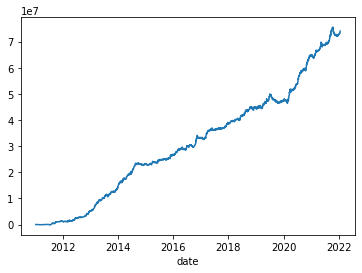

                            0
sharp_ratio_1y       2.619458
sharp_ratio_2y       3.622924
sharp_ratio_3y       2.825937
sharp_ratio_4y       2.697985
sharp_ratio_5y       2.682288
sharp_ratio_6y       2.662033
sharp_ratio_7y       2.582753
sharp_ratio_8y       2.630350
sharp_ratio_9y       2.850159
std_pnl_1y      243511.923179
std_pnl_2y      238073.617814
std_pnl_3y      223536.648069
std_pnl_4y      211703.100780
std_pnl_5y      199144.531904
std_pnl_6y      192469.660552
std_pnl_7y      183870.028845
std_pnl_8y      179435.537308
std_pnl_9y      174464.510054


In [68]:
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:    
    print(pos_sum)

cutoff_date = datetime.date(2016,1,1)

dpnl_cutoff = []
for dpnl in dpnl_by_scen:
    dpnl_cutoff.append(dpnl[dpnl.index >= cutoff_date])

combo_dpnl = pd.concat(dpnl_cutoff, axis = 1)
combo_dpnl.columns = [ '_'.join([scen[0], scen[1], str(idx)]) for idx, scen in enumerate(scenarios)]
    
combo_dpnl.corr().to_csv(file_folder + "port_corr.csv")
pnl_dict = {}    
for idx, (scen, dpnl) in enumerate(zip(scenarios, dpnl_by_scen)):    
    if scen[0] not in pnl_dict:
        pnl_dict[scen[0]] = {}
    if scen[1] not in pnl_dict[scen[0]]:
        pnl_dict[scen[0]][scen[1]] = pd.Series()
    pnl_dict[scen[0]][scen[1]] = pnl_dict[scen[0]][scen[1]].add(dpnl * scen[2], fill_value = 0)

pnl_by_sim = []
for sim_name in pnl_dict:
    pnl_list = []
    for run_mode in pnl_dict[sim_name]:
        print("sim_name = %s, run_mode = %s" % (sim_name, run_mode))
        pnl_list.append(pnl_dict[sim_name][run_mode])
        cpnl = pnl_dict[sim_name][run_mode].cumsum()        
        cpnl.plot()
        plt.show()
        res_pnl = backtest.pnl_stats_by_tenor(pnl_dict[sim_name][run_mode].dropna(), tenors = pnl_tenors, field = None)
        vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
        vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                       ('calmar' in idx) or ('std' in idx)], :]
        print(vdf)            
    print("corr for sim_name = %s" % sim_name)
    xdf = pd.concat(pnl_list, axis = 1)
    tdf = xdf[xdf.index >= cutoff_date]
    print(tdf.corr())
    print("combined pnl for sim_name = %s" % sim_name)
    adf = xdf.sum(axis=1)
    pnl_by_sim.append(adf)
    adf.cumsum().plot()
    plt.show()
    res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
    vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
    print(vdf)
xdf = pd.concat(pnl_by_sim, axis = 1)
tdf = xdf[xdf.index >= cutoff_date]
print(tdf.corr())
print("combined pnl for sim_name = %s" % sim_name)
adf = xdf.sum(axis=1)
pnl_by_sim.append(adf)
adf.cumsum().plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
print(vdf)

In [13]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    


In [9]:
print(df)

           index  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
0     2011-01-04    2373.0    2386.0   2348.0     2365.0      275428   
1     2011-01-05    2343.0    2360.0   2332.0     2336.0      214902   
2     2011-01-06    2349.0    2368.0   2345.0     2352.0      186136   
3     2011-01-07    2343.0    2371.0   2320.0     2336.0      369032   
4     2011-01-10    2344.0    2394.0   2344.0     2377.0      436038   
...          ...       ...       ...      ...        ...         ...   
2499  2021-04-19    5122.0    5143.0   5058.0     5082.0     2509136   
2500  2021-04-20    5091.0    5171.0   5070.0     5165.0     2137195   
2501  2021-04-21    5158.0    5189.0   5125.0     5188.0     2026507   
2502  2021-04-22    5195.0    5238.0   5175.0     5208.0     2569897   
2503  2021-04-23    5225.0    5300.0   5205.0     5299.0     2115301   

      rb1-openInterest rb1-contract  rb1-shift  rb1-contmth  ...  AP2-open  \
0               576934       rb1105    -2457.0       2011

In [ ]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]
rev_char = '!'

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg']

product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
product_name = 'commod_mkts'

sim_name = 'tsmom'
run_mode = 'skew'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2019,6,30)
quantile = 0.2
cost_ratio = 0.5
pos_std = 1
std_win = 20

win = 16
ma_win = 8
rebal = 5
params = [0.0, 0.0]

exec_field = 'open'
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quantile), str(end_date)]))

#curve_list = ['linear', 'semilinear', 'reverting', 'absorbing', 'sigmoid', 'band']
crv_param = 2.0

index_list = [5, 10, 20, 40, 60, 80, 120, 180, 240] # [i for i in range(10, 330, 10)]  # [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # [1, 3, 5, 7, 10, 15, 20] # + range(10, 250, 10) # 
column_list =  [10, 20, 40, 60] #   curve_list #   [1, 2, 3, 4, 5, 10, 15, 20] # range(10, 130, 10) # # [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #

sratio = {}
run_sratio = True

pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
#pos_map = (None, {}, '')
#pos_map = (misc.sign, {}, 'sign')
pos_map = (dh.response_curve, {'param': crv_param, "response": 'reverting'}, 'reverting')

for scen in scenarios:
    scen_x = scen[0]
    scen_y = scen[1]
    if run_mode in ['ryield']:
        win = 1
        ma_win = 1
        rebal = scen_x
        pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
        if sim_name == 'xscarry':
            quantile = scen_x * 0.1
    elif run_mode in ['basmom', 'mom', 'clbrk', 'hlbrk', 'ewmac']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif run_mode in ['ewmacdff']:
        win = scen_x
        rebal = scen_y
        params = params
    elif run_mode in ['skew!ema']:
        win = scen_x
        ma_win = scen_y
        rebal = 1
        params = [0.0, 0.0]
    elif run_mode in ['mixmom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif ('ts' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y
        #pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
    elif ('xs' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y    
    elif run_mode in ['basmomxma', 'basmomsma', 'basmomnma', 'basmomnmb', 'basmomzlv', \
                      'momsma', 'momxma', 'momnma', 'momnmb', 'momzlv', 'macdnma']:
        win = scen_x
        ma_win = 120
        rebal = 5
        if run_mode in ['macdnma']:
            params = [scen_y, 80.0/win]
    else:
        print("unsupported run_mode")
        continue

    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                   ('calmar' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharpe_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')

if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])